### Polynomial Regression Modelling

This notebook applies polynomial regression models to predict the properties of 3D-printed materials based on process parameters. Polynomial regression extends linear regression by introducing interaction and power terms, allowing the model to capture nonlinear relationships between input features and targets.

We investigate models of degree 2 and 3 for three output variables:
- **Roughness**
- **Elongation**
- **Tension Strength**

The analysis includes performance metrics, residual diagnostics, and cross-validation. This approach enables comparison of under- vs overfitting behaviour and assesses how well polynomial models generalise for each target.

### Polynomial Regression Setup

This cell imports the required libraries for performing polynomial regression. It includes modules for data manipulation (`pandas`, `numpy`), visualisation (`matplotlib.pyplot`, `seaborn`), polynomial feature expansion, regression modelling, data splitting, and common evaluation metrics. These imports set the foundation for applying a nonlinear regression approach using polynomial transformations.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

### Residual Distribution Function

This function generates a histogram to visualise the distribution of residuals (i.e., the differences between actual and predicted values) for a given target variable. A well-performing regression model should have residuals symmetrically distributed around zero, indicating low bias and consistent predictions. The histogram and KDE help assess whether the error distribution meets this expectation.

In [38]:
def plot_residuals(y_true, y_pred, target_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'Residuals Distribution for {target_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



### Load and Clean Dataset

The dataset is loaded from a cleaned CSV file using `pandas`. To ensure consistent column naming, any leading or trailing whitespace in column names is removed using `.str.strip()`. This step helps prevent issues when referencing column names in later analysis.

In [39]:
dataset = pd.read_csv('clean_dataset.csv')
dataset.columns = dataset.columns.str.strip()

### Polynomial Regression Function

This function implements polynomial regression using a `LinearRegression` model from `scikit-learn`, enhanced with polynomial feature transformation. It includes:

- Data splitting into training and test sets (with a fixed random seed for reproducibility).
- Feature scaling using `StandardScaler` prior to polynomial transformation to improve model performance.
- Polynomial feature expansion (default degree 2).
- Model fitting, prediction, and evaluation using common metrics: R², MAE, and RMSE.
- A visual comparison of actual vs. predicted values for intuitive assessment of fit.

This approach allows for capturing non-linear relationships between predictors and the target variable.

In [40]:
def run_poly_regression(X, y, target_name, degree=2):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.preprocessing import PolynomialFeatures
    import numpy as np
    import matplotlib.pyplot as plt

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = model.score(X_train_poly, y_train)
    r2_test = model.score(X_test_poly, y_test)

    print(f"Polynomial Regression – {target_name} (degree={degree})")
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test  R²: {r2_test:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return y_test, y_pred

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"Actual vs Predicted - {target_name} (Poly Deg {degree})")
    plt.grid(True)
    plt.show()



### Polynomial Regression on Roughness

This cell evaluates a second-degree polynomial regression model using all features except the target variable (`'roughness'`). The model fitting and evaluation are handled by the `run_poly_regression` function. Key outputs:

- **Train R²**: 1.0000 – indicates potential overfitting, as the model fits the training data perfectly.
- **Test R²**: -0.3732 – negative score signals poor generalisation to unseen data.
- **MAE / RMSE**: The model yields high error values, further confirming overfitting.

This result suggests that a polynomial model of degree 2, while expressive, may not be suitable without additional regularisation or feature selection.

In [41]:
X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])
run_poly_regression(X, dataset['roughness'], 'Roughness', degree=2)


Polynomial Regression – Roughness (degree=2)
Train R²: 1.0000
Test  R²: -0.3732
MAE: 67.1862
RMSE: 73.2923


(19     74
 16    145
 15    126
 26    212
 4      92
 12    118
 37    278
 27    168
 Name: roughness, dtype: int64,
 array([-5.25444268e-02,  2.20489561e+02,  7.30189019e+01,  2.68018644e+02,
        -5.58335667e+00,  1.86859006e+01,  3.58360900e+02,  1.69689701e+02]))

### Residual Analysis for Polynomial Regression on Roughness

This cell evaluates a second-degree polynomial regression model on `'Roughness'` using all remaining features as predictors. It also visualises the residuals using a histogram with kernel density estimation.

- **Train R²**: 1.0000 – perfect training fit, indicating overfitting.
- **Test R²**: -0.3732 – the model fails to generalise to unseen data.
- **MAE / RMSE**: High error values (67.19 and 73.29) further confirm the model's poor test performance.

The residual distribution plot highlights the model's erratic performance. Residuals are widely spread and do not resemble a normal distribution, suggesting model instability and the presence of outliers or non-linearity not captured effectively.

Polynomial Regression – Roughness (degree=2)
Train R²: 1.0000
Test  R²: -0.3732
MAE: 67.1862
RMSE: 73.2923


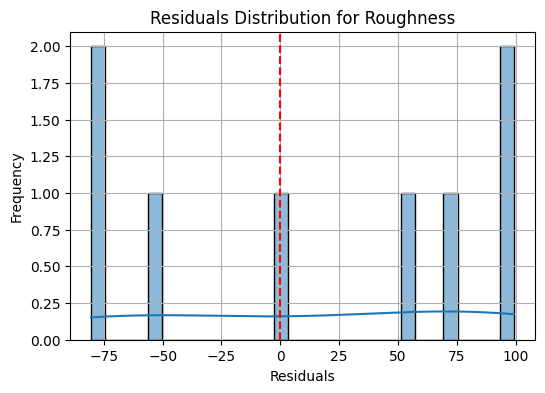

In [42]:
X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])
y = dataset['roughness']
y_test, y_pred = run_poly_regression(X, y, 'Roughness', degree=2)
plot_residuals(y_test, y_pred, "Roughness")

### Polynomial Regression – Elongation (Degree = 2)

This section fits a second-degree polynomial regression model to predict `Elongation` using all other features.

- **Train R²**: 1.0000 – perfect fit on training data, suggesting overfitting.
- **Test R²**: 0.2042 – indicates limited generalisation, but significantly better than the result for `Roughness`.
- **MAE**: 0.5436  
- **RMSE**: 0.6018

Despite the overfitting indicated by the perfect training score, the model manages modest predictive power on test data, suggesting `Elongation` might have a more consistent relationship with the predictors than `Roughness`.

In [43]:
run_poly_regression(X, dataset['elongation'], 'Elongation', degree=2)

Polynomial Regression – Elongation (degree=2)
Train R²: 1.0000
Test  R²: 0.2042
MAE: 0.5436
RMSE: 0.6018


(19    2.0
 16    1.9
 15    2.2
 26    1.8
 4     0.7
 12    1.3
 37    3.2
 27    2.1
 Name: elongation, dtype: float64,
 array([ 2.1236939 ,  1.10693273,  1.78861449,  1.36536164, -0.24105011,
         1.94376583,  2.48370889,  1.81478813]))

### Polynomial Regression – Tension Strength (Degree = 2)

This model applies a second-degree polynomial regression to predict `Tension Strength`.

- **Train R²**: 1.0000 – indicates overfitting.
- **Test R²**: -0.5493 – suggests the model performs worse than simply predicting the mean.
- **MAE**: 7.3642  
- **RMSE**: 9.6617

The large discrepancy between training and test performance implies that the model is overfitted and generalises poorly for this target variable. A different modelling approach or feature set may be required.

In [44]:
run_poly_regression(X, dataset['tension_strenght'], 'Tension Strength', degree=2)

Polynomial Regression – Tension Strength (degree=2)
Train R²: 1.0000
Test  R²: -0.5493
MAE: 7.3642
RMSE: 9.6617


(19    29
 16    23
 15    27
 26    24
 4      5
 12    16
 37    30
 27    26
 Name: tension_strenght, dtype: int64,
 array([32.5803142 , 25.21717004, 48.68133307, 17.8776877 ,  5.68829773,
        25.46162415, 19.54316255, 21.29456851]))

### Polynomial Regression – Roughness (Degree = 3)

A third-degree polynomial regression was used to model `Roughness` based on the remaining features.

- **Train R²**: 1.0000 – perfect fit on training data, again suggesting overfitting.
- **Test R²**: 0.4045 – a noticeable improvement over the degree 2 model, but still leaves room for refinement.
- **MAE**: 42.1040  
- **RMSE**: 48.2654

The test R² value indicates that the model is beginning to generalise better compared to lower-degree polynomials, though high error values suggest it still struggles with variance or possible data noise. Further regularisation or feature engineering may help.

Polynomial Regression – Roughness (degree=3)
Train R²: 1.0000
Test  R²: 0.4045
MAE: 42.1040
RMSE: 48.2654


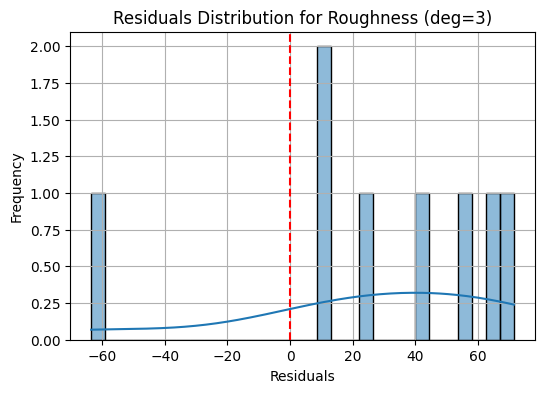

In [45]:
X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])
y = dataset['roughness']
y_test, y_pred = run_poly_regression(X, y, 'Roughness', degree=3)
plot_residuals(y_test, y_pred, "Roughness (deg=3)")

### Polynomial Regression – Tension Strength (Degree = 3)

This model applies third-degree polynomial regression to predict `Tension Strength` using the remaining features.

- **Train R²**: 1.0000 – the model fits the training data perfectly.
- **Test R²**: 0.0102 – minimal improvement over previous models, indicating continued overfitting.
- **MAE**: 5.2318  
- **RMSE**: 7.7226

While error metrics improved over the degree 2 model, the test R² still shows poor generalisation. The distribution of residuals also suggests that while predictions are closer to true values, the model does not capture underlying variance well.

Polynomial Regression – Tension Strength (degree=3)
Train R²: 1.0000
Test  R²: 0.0102
MAE: 5.2318
RMSE: 7.7226


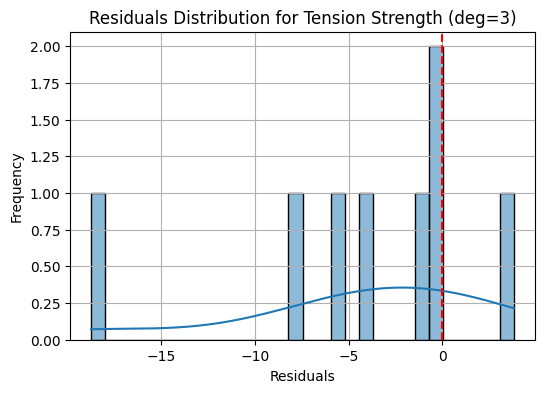

In [46]:
X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])
y = dataset['tension_strenght']
y_test, y_pred = run_poly_regression(X, y, 'Tension Strength', degree=3)
plot_residuals(y_test, y_pred, "Tension Strength (deg=3)")

### Polynomial Regression – Elongation (Degree = 3)

This model fits a third-degree polynomial regression to predict `Elongation` based on the remaining features.

- **Train R²**: 1.0000 – near-perfect fit to training data.
- **Test R²**: 0.6860 – a significant improvement over the second-degree model.
- **MAE**: 0.2867  
- **RMSE**: 0.3780

This model generalises well to unseen data compared to lower-degree variants, indicating a more effective fit. The residuals are compact and symmetrically distributed around zero, which supports the improvement in performance.

Polynomial Regression – Elongation (degree=3)
Train R²: 1.0000
Test  R²: 0.6860
MAE: 0.2867
RMSE: 0.3780


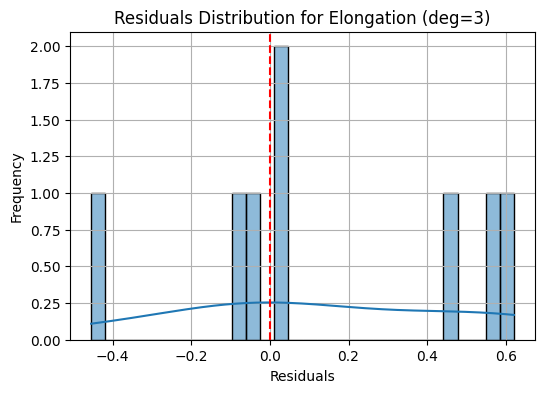

In [47]:
X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])
y = dataset['elongation']
y_test, y_pred = run_poly_regression(X, y, 'Elongation', degree=3)
plot_residuals(y_test, y_pred, "Elongation (deg=3)")

### Cross-Validation Results – Polynomial Regression (Degree = 3)

A 5-fold cross-validation was used to assess the generalisation performance of the polynomial models on each target variable. The pipeline included feature scaling, polynomial feature transformation, and linear regression.

#### Roughness
- **R² scores per fold**: [-7.77, 0.15, 0.80, 0.87, -0.33]
- **Mean R²**: -1.26  
- **Standard Deviation**: 3.28

#### Elongation
- **R² scores per fold**: [-4.04, 0.11, 0.50, 0.27, 0.06]
- **Mean R²**: -0.62  
- **Standard Deviation**: 1.72

#### Tension Strength
- **R² scores per fold**: [-6.15, 0.50, 0.30, -0.02, -2.55]
- **Mean R²**: -1.58  
- **Standard Deviation**: 2.54

These results indicate high variability across folds and generally poor generalisation performance. The negative mean R² values, particularly for `Roughness` and `Tension Strength`, suggest that the third-degree polynomial model may be overfitting on the training data and underperforming on unseen data. Despite good performance on training sets, these findings highlight the importance of using cross-validation to assess model robustness.

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def evaluate_with_cross_val(X, y, target_name, degree=3):
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=degree), LinearRegression())
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"Cross-Validation for {target_name} (degree={degree}):")
    print("R² scores per fold:", scores)
    print("Mean R²:", scores.mean())
    print("Std Deviation:", scores.std())

X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

evaluate_with_cross_val(X, dataset['roughness'], 'Roughness', degree=3)

evaluate_with_cross_val(X, dataset['elongation'], 'Elongation', degree=3)

evaluate_with_cross_val(X, dataset['tension_strenght'], 'Tension Strength', degree=3)

Cross-Validation for Roughness (degree=3):
R² scores per fold: [-7.76648994  0.14603598  0.7969455   0.86534564 -0.32593683]
Mean R²: -1.2568199296325744
Std Deviation: 3.2842621966272025
Cross-Validation for Elongation (degree=3):
R² scores per fold: [-4.04332521  0.10819501  0.49689069  0.27352779  0.05841021]
Mean R²: -0.621260303098307
Std Deviation: 1.7178761683041854
Cross-Validation for Tension Strength (degree=3):
R² scores per fold: [-6.15025257  0.50180999  0.30247102 -0.0193143  -2.55434266]
Mean R²: -1.5839257033320786
Std Deviation: 2.5357383505427276


### Final Summary – Polynomial Regression Analysis

This notebook applied polynomial regression models (degree 2 and 3) to predict three target variables: `Roughness`, `Elongation`, and `Tension Strength`. The analysis included residual plots, error metrics, and cross-validation for each target and degree.

Key findings:

- **Overfitting is common**: Train R² values were consistently 1.0000, while test R² values were often negative or modest. This reflects a model that learns the training data too well but fails to generalise.
- **Higher degrees help, but not always**: Moving from degree 2 to 3 generally improved test R², especially for `Elongation`, but gains were inconsistent across all targets.
- **Cross-validation highlights instability**: Fold-to-fold variance and negative mean R² scores confirm the model's lack of robustness, particularly for `Roughness` and `Tension Strength`.

While polynomial regression can capture nonlinear patterns, these results highlight its sensitivity to noise and the need for careful tuning or regularisation. Future work could explore Lasso/Ridge regularised polynomial models or dimensionality reduction prior to expansion.